# Polar Plots

Using the best-fit deprojection parameters, plot the polar plots to see if there's any azimuthal structure left.

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
from imgcube.cube import imagecube
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import griddata
import matplotlib.cm as cm
import pandas as pd
import numpy as np
plt.style.use('paper')

In [103]:
# Define nicer red=blue map.
import matplotlib.colors as mcolors
c2 = plt.cm.Reds(np.linspace(0, 1, 128))
c1 = plt.cm.Blues_r(np.linspace(0, 1, 128))
c1 = np.vstack([c1, [1, 1, 1, 1]])
colors = np.vstack((c1, c2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [87]:
# Load up the data.
B6 = imagecube('../data/cont/TWHya.230GHz.circ.fits', kelvin='RJ', clip=1.1)
B7 = imagecube('../data/cont/TWHya.345GHz.circ.fits', kelvin='RJ', clip=1.1)

In [88]:
# Load up the samples and calculate medians.
B6_samples = np.median(pd.read_pickle('../fitting/TWHya.230GHz.circ.tightPAprior.trace.dat'), axis=0)
B7_samples = np.median(pd.read_pickle('../fitting/TWHya.345GHz.circ.tightPAprior.trace.dat'), axis=0)

In [89]:
def polar_plot(cube, samples):
    """Deproject the data into a polar plot."""
    x0, y0, _, _, _, _, inc, PA, _, _ = samples
    rvals, tvals, _ = cube.disk_coords(x0=x0, y0=y0, inc=inc, PA=PA)
    rgrid = np.linspace(0, 1.0, 150)
    tgrid = np.linspace(-np.pi, np.pi, 150)
    dgrid = griddata((rvals.flatten(), tvals.flatten()), cube.data.flatten(),
                     (rgrid[None, :], tgrid[:, None]), method='nearest')
    return rgrid, tgrid, dgrid

Text(0.5,1,'Band 7 - 345~GHz Continuum')

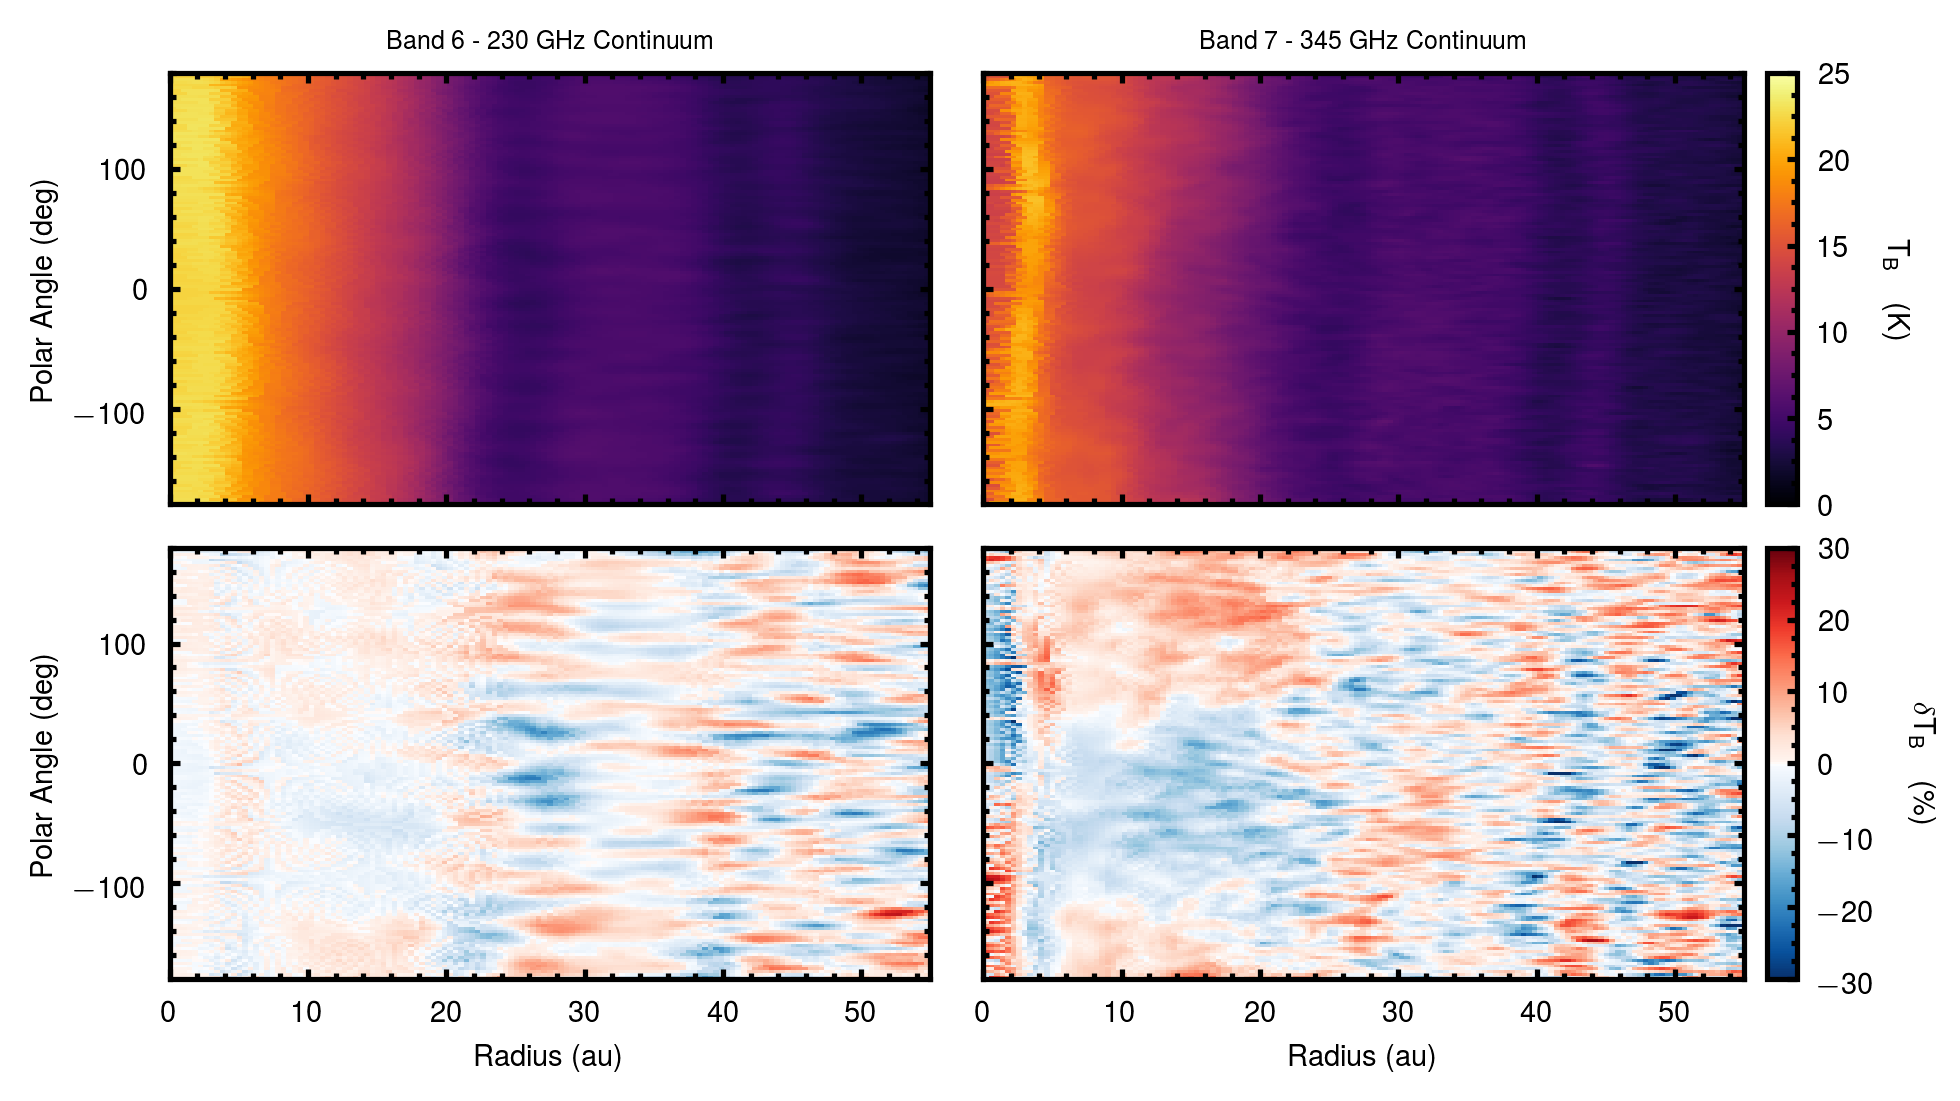

In [111]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 4), gridspec_kw=dict(hspace=0.1, wspace=0.0))
axs = axs.T.flatten()
for ax in axs:
    ax.tick_params(which='both', right=1, top=1)

# Band 6.

r, t, d = polar_plot(B6, B6_samples)
residual = 1e2 * (d - np.nanmean(d, axis=0)[None, :]) / d

extent = [r[0] * 60.1, r[-1] * 60.1, np.degrees(t[0]), np.degrees(t[-1])]

im1 = axs[0].imshow(d, origin='lower', extent=extent, aspect='auto',
                    cmap='inferno', vmin=0.0, vmax=25.0, interpolation='nearest')
im2 = axs[1].imshow(residual, origin='lower', extent=extent, aspect='auto',
                    cmap=mymap, vmin=-30, vmax=30, interpolation='nearest')

# Band 7.

r, t, d = polar_plot(B7, B6_samples)
residual = 1e2 * (d - np.nanmean(d, axis=0)[None, :]) / d

extent = [r[0] * 60.1, r[-1] * 60.1, np.degrees(t[0]), np.degrees(t[-1])]

im1 = axs[2].imshow(d, origin='lower', extent=extent, aspect='auto',
                    cmap='inferno', vmin=0.0, vmax=25.0, interpolation='nearest')
im2 = axs[3].imshow(residual, origin='lower', extent=extent, aspect='auto',
                    cmap=mymap, vmin=-30, vmax=30, interpolation='nearest')

# Colorbars

cax = make_axes_locatable(axs[0]).append_axes('right', size='4%', pad=0.075)
cax.axis('off')

cax = make_axes_locatable(axs[2]).append_axes('right', size='4%', pad=0.075)
cb = plt.colorbar(im1, cax=cax, orientation='vertical')
cb.set_label(r'${\rm T_B \quad (K)}$', rotation=270, labelpad=13)

cax = make_axes_locatable(axs[1]).append_axes('right', size='4%', pad=0.075)
cax.axis('off')

cax = make_axes_locatable(axs[3]).append_axes('right', size='4%', pad=0.075)
cb = plt.colorbar(im2, cax=cax, orientation='vertical')
cb.set_label(r'${\rm \delta T_B \quad (\%)}$', rotation=270, labelpad=13)

# Gentrification.

axs[0].set_xticklabels([])
axs[2].set_xticklabels([])
axs[1].set_xlabel('Radius (au)')
axs[3].set_xlabel('Radius (au)')
for ax in axs:
    ax.set_xlim(0, 55)

axs[2].set_yticklabels([])
axs[3].set_yticklabels([])
axs[0].set_ylabel('Polar Angle (deg)')
axs[1].set_ylabel('Polar Angle (deg)')

axs[0].set_title('Band 6 - 230~GHz Continuum', fontsize=6)
axs[2].set_title('Band 7 - 345~GHz Continuum', fontsize=6)
